In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
tc = sns.load_dataset('titanic')

In [5]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
tc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
tc.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
tc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
tc=tc[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']]

In [12]:
tc.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [13]:
tc['age'].fillna(tc['age'].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_25316\1414570506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc['age'].fillna(tc['age'].mean(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_25316\1414570506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc['age'].fillna(tc['age'].mean(),inplace=True)


In [14]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
tc.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [23]:
tc.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_25316\3898210901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc.dropna(inplace=True)


In [24]:
X=tc[['sex', 'age', 'sibsp', 'parch', 'fare','pclass','embarked']]
y=tc['survived']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((711, 7), (178, 7), (711,), (178,))

C:\Users\hp\AppData\Local\Temp\ipykernel_25316\2656083885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


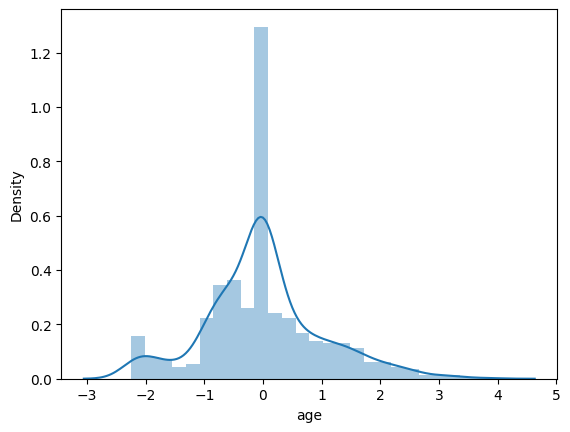

In [40]:
import warnings
sns.distplot(X_train['age'])
plt.show()

In [38]:
# feature scalling
age_scaler=StandardScaler()
fare_scaler=StandardScaler()
age_scaler.fit(pd.DataFrame(X_train['age']))
X_train['age'] = age_scaler.transform(X_train[['age']])


In [39]:
fare_scaler.fit(pd.DataFrame(X_train['fare']))
X_train['fare'] = fare_scaler.transform(pd.DataFrame(X_train['fare']))

C:\Users\hp\AppData\Local\Temp\ipykernel_25316\1384924011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


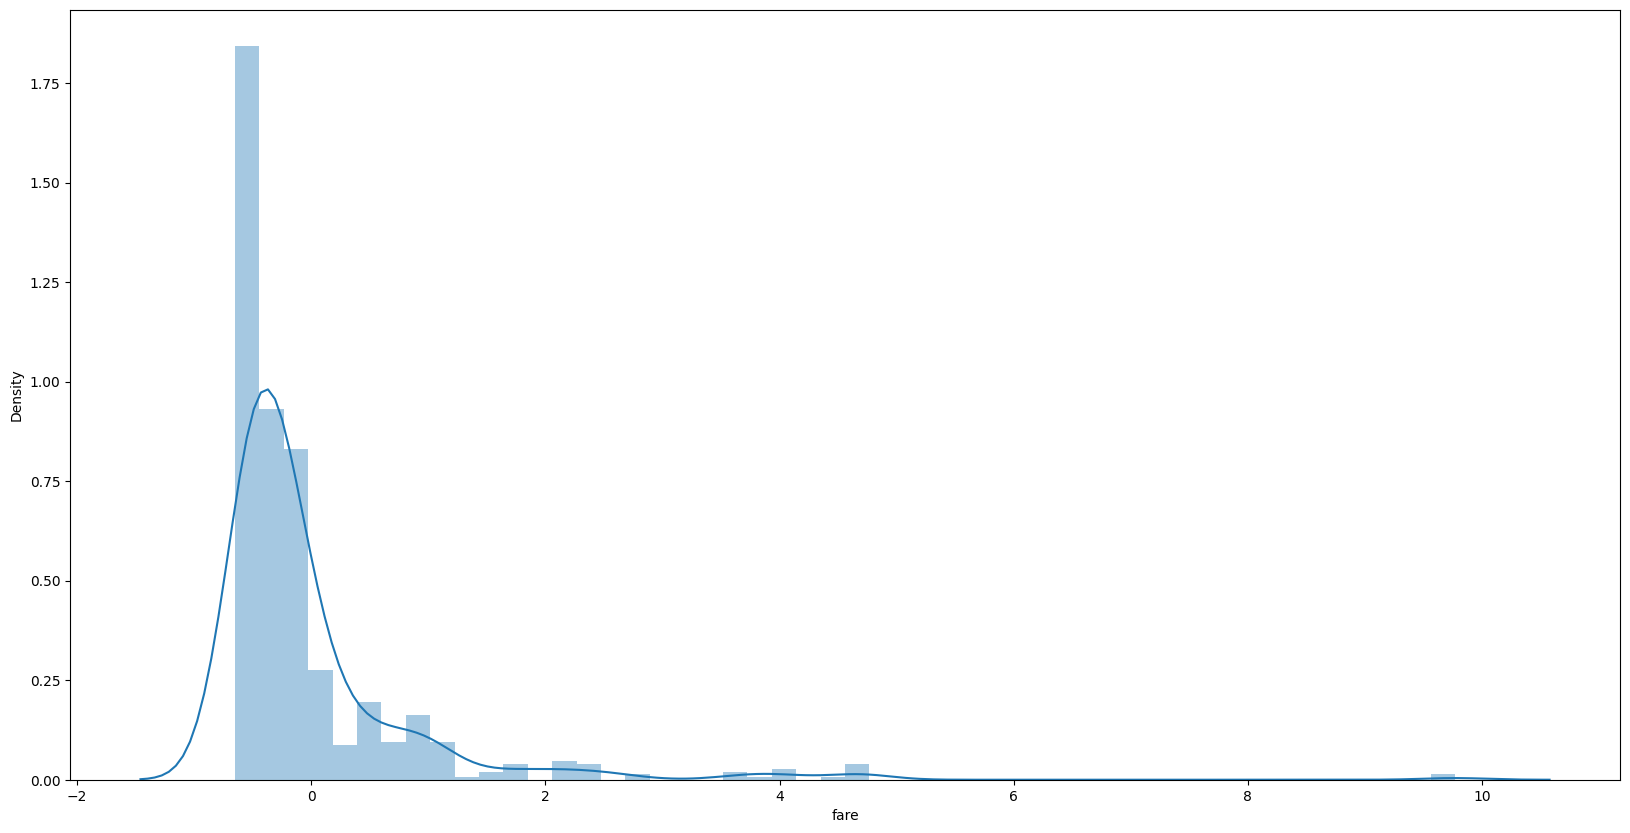

In [46]:
plt.figure(figsize=(20,10))

sns.distplot(X_train['fare'])
plt.show()

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    object 
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   pclass    711 non-null    int64  
 6   embarked  711 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.4+ KB


In [48]:
sex_encoder = LabelEncoder()
sex_encoder.fit(pd.DataFrame(X_train['sex']))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [49]:
X_train['sex']=sex_encoder.transform(X_train['sex'])

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    int32  
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   pclass    711 non-null    int64  
 6   embarked  711 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 41.7+ KB


In [51]:
embarked_encoder = LabelEncoder()
embarked_encoder.fit(pd.DataFrame(X_train['embarked']))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [52]:
X_train['embarked']=embarked_encoder.transform(X_train['embarked'])

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    int32  
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   pclass    711 non-null    int64  
 6   embarked  711 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 38.9 KB


In [ ]:
X_train